In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
df["age"] = df["age"].fillna(df["age"].mode()[0]).astype(int)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,24,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [46]:
df_new = df.drop(columns=["fare","embark_town","alive","alone","class","adult_male","deck","who"])
df_new.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S


In [49]:
df_new["embarked"] = df_new["embarked"].fillna(df_new["embarked"].mode()[0])

survived = df_new["survived"].sum()
df_new.loc[df_new["age"] == 0, "age"] = np.nan
df_new["age"] = df_new["age"].fillna(df_new["age"].median())


In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [51]:
df_new[["sex", "embarked"]].nunique()

sex         2
embarked    3
dtype: int64

In [52]:
df_new["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [53]:
df_new["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [54]:
import matplotlib.pyplot as plt

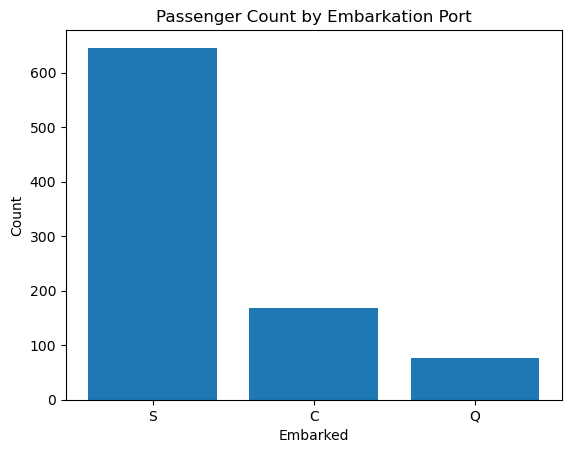

In [55]:
counts = df_new["embarked"].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Passenger Count by Embarkation Port")
plt.show()


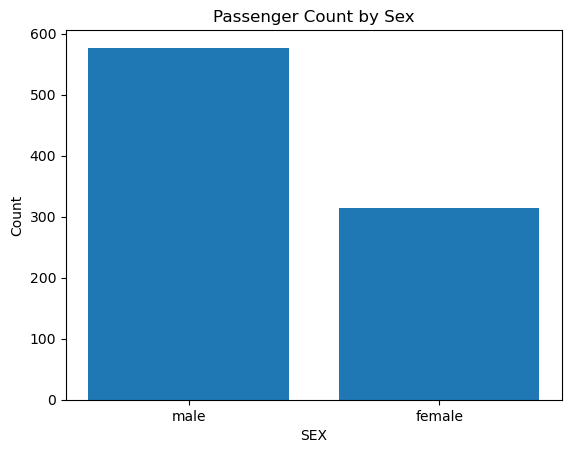

In [56]:
counts = df_new["sex"].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("SEX")
plt.ylabel("Count")
plt.title("Passenger Count by Sex")
plt.show()


In [57]:
df_new[["age","sibsp","parch","pclass"]].describe()

,age,sibsp,parch,pclass
count,891.000000,891.000000,891.000000,891.000000
mean,28.739618,0.523008,0.381594,2.308642
std,12.966924,1.102743,0.806057,0.836071
min,1.000000,0.000000,0.000000,1.000000
25%,22.000000,0.000000,0.000000,2.000000
50%,24.000000,0.000000,0.000000,3.000000
75%,35.000000,1.000000,0.000000,3.000000
max,80.000000,8.000000,6.000000,3.000000


In [58]:
df_new[["age","sibsp","parch","pclass"]].corr()

,age,sibsp,parch,pclass
age,1.000000,-0.230206,-0.141950,-0.363301
sibsp,-0.230206,1.000000,0.414838,0.083081
parch,-0.141950,0.414838,1.000000,0.018443
pclass,-0.363301,0.083081,0.018443,1.000000


(array([ 47.,  46., 362., 170., 118.,  68.,  45.,  24.,   9.,   2.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

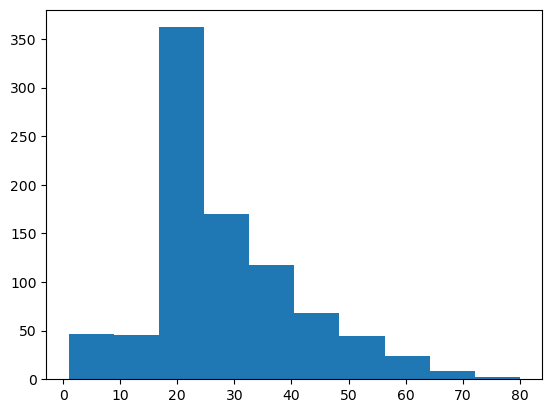

In [59]:
plt.hist(df_new["age"])

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

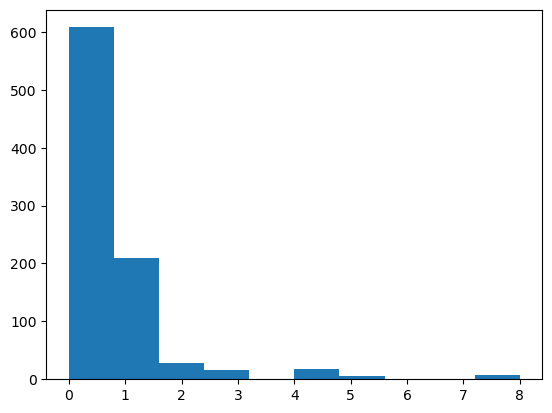

In [60]:
plt.hist(df_new["sibsp"])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

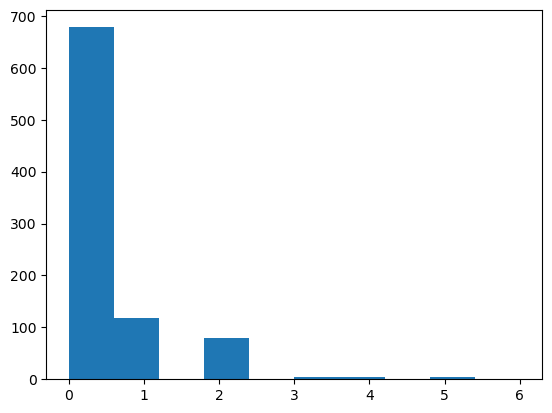

In [32]:
plt.hist(df_new["parch"])

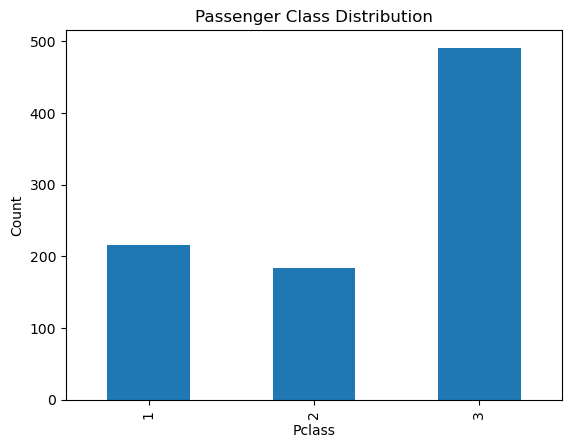

In [62]:
df_new["pclass"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Passenger Class Distribution")
plt.show()


In [65]:
df_new["family_size"] = df_new["sibsp"] + df_new["parch"] + 1

In [66]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,embarked,family_size
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [71]:
df_new[["survived","sex"]].value_counts()

survived  sex   
0         male      468
1         female    233
          male      109
0         female     81
Name: count, dtype: int64

In [72]:
df_new[["survived","sex"]].value_counts().sort_index()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: count, dtype: int64

In [73]:
df_new[["survived","pclass"]].value_counts().sort_index()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: count, dtype: int64

In [74]:
df_new[["survived","family_size"]].value_counts().sort_index()

survived  family_size
0         1              374
          2               72
          3               43
          4                8
          5               12
          6               19
          7                8
          8                6
          11               7
1         1              163
          2               89
          3               59
          4               21
          5                3
          6                3
          7                4
Name: count, dtype: int64

In [75]:
df_new[["survived","age"]].value_counts().sort_index()

survived  age 
0         1.0     2
          2.0     7
          3.0     1
          4.0     3
          6.0     1
                 ..
1         58.0    3
          60.0    2
          62.0    2
          63.0    2
          80.0    1
Name: count, Length: 123, dtype: int64

### 🎯 Summary of All  EDA Insights So Far

 now have the final Titanic EDA conclusions:

Top survival factors

Sex → Females survive far more

Pclass → 1st class highest survival

Age → Children survive most

Family size → Medium families survive most

Embarked → C slightly higher survival than S (you found that earlier)